<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Final_Covid19_Vaccination_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Vaccination Data Visualisation Project
-----

This data has been collated from many different government sources worldwide on vaccination numbers.
The first date is 14th Dec 2020 and the last data is 2nd May 2021, a small window into the vaccinations roll out around the world in this global pandemic. 

[Source: Vaccination dataset](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)


### First prepare the dataset for use.
---
1. Read Covid vaccination data from the `by_country` sheet in the Excel file at this link : https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true
2. Find out which columns have missing values
3. Remove all rows with missing data in the total_vaccination column  
4. Remove all rows with missing data in the daily_vaccinations_per_million 
5. find the median daily_vaccinations_per_million, storing this in a variable for use later     




In [1]:
import pandas as pd

def get_data(url, worksheet):
  #Read in the data from the By Country worksheet.
  df = pd.read_excel(url, worksheet)
  return df

url = "https://github.com/bjentwistle/PythonFundamentals/blob/main/Datasets/Covid%20Vaccination%20Data%20edited.xlsx?raw=true"
vaccine_data = get_data(url, "by_country")

vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

### Describing the data.

There are 14,994 rows of data with 15 columns (some with null data in)
The columns contain names of countries or numbers of vaccinations. Here is an explanation of the columns taken from the source.
0. country :	 Country that the data was collected from (or region within a country).                          
1. iso_code :	ISO 3166-1 alpha-3 –  a three letter abbreviation of the country, e.g. ALB for Albania.                        
2. date :	 the day on which that row of data was collected.                        
3. total_vaccinations :	 Total number of vaccinations that day?        
4. people_vaccinated :	total number of doses administered. For vaccines that require multiple doses, each individual dose is counted. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again. If they receive a third/booster dose, it goes up by 1 again.
5. people_fully_vaccinated  :	total number of people who received all doses prescribed by the initial vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.
6. daily_vaccinations_raw  :	daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead.
7. daily_vaccinations  : 	new doses administered per day (7-day smoothed). For countries that don't report data on a daily basis, we assume that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. An example of how we perform this calculation can be found here. 

8. total_vaccinations_per_hundred  :	total_vaccinations per 100 people in the total population of the country. 

9. people_vaccinated_per_hundred  :	people_vaccinated per 100 people in the total population of the country. 
10. people_fully_vaccinated_per_hundred  : 	total number of people who received all doses prescribed by the initial vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.
11. daily_vaccinations_per_million  :	daily_vaccinations per 1,000,000 people in the total population of the country.
12. vaccines :	 list of vaccines administered in the country up to the current date.
13. source_name  :	 this refers to the name of our source for data collection.

For the purpose of this project, I am only interested in rows that have data in the Total Vaccinations column. 



In [2]:
#Small function to print out the maximum and minimum values of a given column.

def get_maxandmin(df,column): 
  print(df[column].min())
  print(df[column].max())

get_maxandmin(vaccine_data,"date")

2020-12-14 00:00:00
2021-05-02 00:00:00


In [3]:
def remove_nulls(df,column):

  #Remove all rows with missing data in the given column 
  df_nulls_rm = df[~df[column].isnull()].reset_index(drop=True)
  #df_nulls_rm.info()

  return df_nulls_rm

vaccine_data_nonulls = remove_nulls(vaccine_data,"total_vaccinations" )
#now we have 9,011 rows and 15 columns (still some null values)
vaccine_data_nonulls = remove_nulls(vaccine_data_nonulls,"daily_vaccinations_per_million")
#now we have 8,819 rows and 15 columns (still some null values)

vaccine_data_nonulls

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan
1,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan
2,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan
3,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan
4,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,Zimbabwe,ZWE,2021-04-28,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health
8812,Zimbabwe,ZWE,2021-04-29,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0,Sinopharm/Beijing,Ministry of Health
8813,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health
8814,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health


**For fun I used the unique ISO codes to produce a WordCloud, this gives a visual of how many countries are included in this data.**

In [4]:
!pip install wordcloud

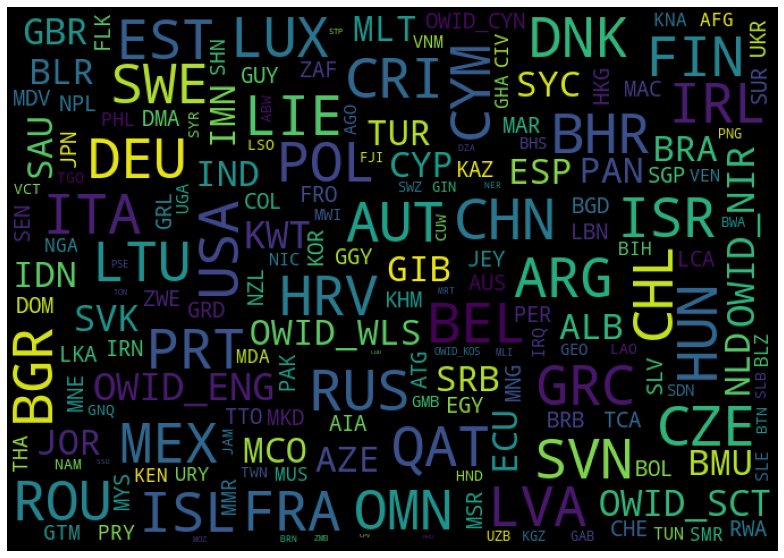

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Produce a wordcloud image to show all the country codes within the dataframe.
def word_cloud(df):
  word_cloud = WordCloud(collocations=False, width=680, height=480,
                        margin=10, background_color='black', max_font_size = 50, 
                        repeat=False).generate(' '.join(df.iso_code))
  plt.figure(figsize=(30,10))
  plt.axis('off')
  plt.imshow(word_cloud)
  plt.show()

word_cloud(vaccine_data)

### Encode daily vaccinations 
---
As this is a global vaccination campaign it is interesting to see which countries have mobilised their general public to get vaccinated and those who are sturggling to keep up. By looking at the those countries above the mean and those below we can get some idea of which countries are succeeding and which need more help to fight Coronavirus.

Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

In [6]:
#Find the median daily_vaccinations_per_million, storing this in a variable for use later 
median_daily = vaccine_data_nonulls["daily_vaccinations_per_million"].median()

#Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0
#rename the dataframe to make it easier to follow the code below
df_encoded = vaccine_data_nonulls #this is the df with 8819 rows

def encode_daily(df, **kwds):
  median = kwds["median"]
  column = kwds["column"]

  if df[column] >= median:
    return 1
  else:
    return 0

df_encoded["above median"] = df_encoded.apply(encode_daily, axis=1, column = "daily_vaccinations_per_million", median = median_daily)
df_encoded.info()
#now we have 8,819 rows and now have 16 columns (new column for "above median")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8816 entries, 0 to 8815
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8816 non-null   object        
 1   iso_code                             8816 non-null   object        
 2   date                                 8816 non-null   datetime64[ns]
 3   total_vaccinations                   8816 non-null   float64       
 4   people_vaccinated                    8126 non-null   float64       
 5   people_fully_vaccinated              6143 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   8816 non-null   float64       
 8   total_vaccinations_per_hundred       8816 non-null   float64       
 9   people_vaccinated_per_hundred        8126 non-null   float64       
 10  people_fully

In [7]:
#Display the unique countries for which total vaccinated is at the same rate or more than the world median.
def unique_countries(df, column):
  df = df[df[column]==1]
  unique_countries = df["country"].unique()
  print("Unique countries = ", unique_countries.shape, unique_countries)
  return unique_countries

above_median_unique_countries = unique_countries(df_encoded, "above median")

Unique countries =  (119,) ['Albania' 'Andorra' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia' 'Brazil' 'Bulgaria'
 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Dominica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'England'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'Germany' 'Gibraltar'
 'Greece' 'Greenland' 'Grenada' 'Guernsey' 'Guyana' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jamaica'
 'Jersey' 'Jordan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Macao' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Monaco' 'Mongolia' 'Montenegro' 'Montserrat' 'Morocco' 'Nauru'
 'Netherlands' 'Northern Cyprus' 'Northern Ireland' 'Norway' 'Oman'
 'Panama' 'Poland' 'Port

These countries are leading the vaccination campaign. Arguably, most of these are the richest countries in the world but there are some surprises in the mix. For instance, Dominican republic's vaccine numbers are above the mean. This may be because it is a holiday destination but with tourism suffering during the pandemic I think people are simply getting vaccinated for thier health.

###  Encoding total vaccinations   
---
The United Kingdom has been praised for it's fast vaccine rollout. 
1. Find the minimum total vaccinations for the United Kingdom 
2. Write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK

In [8]:
#Find the minimum total vaccinations for the United Kingdom 
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min = vaccine_data.loc[vaccine_data['country']== "United Kingdom", "total_vaccinations"].min()
print("UK Minimum = ", df_UK_min)


UK Minimum =  1402432.0


In [9]:
#Find the minimum total vaccinations for the United Kingdom 
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min = vaccine_data.loc[vaccine_data['country']== "United Kingdom", "total_vaccinations"].min()
print("UK Minimum = ", df_UK_min)

#Write a function to encode total_vaccinations column so that all values 
#less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1.
df_encoded_min = vaccine_data_nonulls 

def encode_above_Uk_min(df, **kwds):
  Min = kwds['minimum']
  column = kwds["column"]

  if df[column] >= Min:
    return 1
  else:
    return 0

df_encoded_min["above UK Minimum"] = df_encoded_min.apply(encode_above_Uk_min, axis=1, 
                                                          column = "total_vaccinations", minimum = df_UK_min)

df_encoded_min["above UK Minimum"].describe() #show that the max is 1 and min is 0 for this new column

UK Minimum =  1402432.0


count    8816.000000
mean        0.304446
std         0.460199
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: above UK Minimum, dtype: float64

In [10]:
#Display the unique countries for which total vaccinated is at the same rate or more than the UK

above_UKMin_unique_countries = unique_countries(df_encoded_min, "above UK Minimum")

Unique countries =  (59,) ['Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belgium'
 'Brazil' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia' 'Czechia'
 'Denmark' 'Dominican Republic' 'England' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Morocco' 'Nepal'
 'Netherlands' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Serbia'
 'Singapore' 'Slovakia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Wales']


This list is of all the countries that have done as well or better than the United Kingdom with vaccination rollout in the time window of this dataset. NB England, Wales, and Scotland are represented here too. They should all be incorporated into the UK figures. I suspect they were input by different health boards. Hopefully, this doesn't skew the figures too much. 

In [11]:
# To find out what each countries total vaccinations to date are, we need a list of each country and a running total of the daily vaccinated column.
#Adapted this code from https://www.analyticsvidhya.com/blog/2021/05/analyze-covid-vaccination-progress-using-python/
countries_total_vaccinations = {}
for country in above_UKMin_unique_countries: 
  vaccinated = 0
  for i in range(len(vaccine_data_nonulls)): 
    if vaccine_data_nonulls.country[i] == country:
        vaccinated += vaccine_data_nonulls.daily_vaccinations[i]
  countries_total_vaccinations[country] = vaccinated 
  #make a seperate dicionary from the original dataframe 
  countries_total_vaccinations_df = pd.DataFrame.from_dict(countries_total_vaccinations,
                                                         orient='index',
                                                         columns = ['total_vaccinted_todate']).reset_index(drop=False)
#convert dictionary into a dataframe 
countries_total_vaccinations_df.sort_values(by = 'total_vaccinted_todate', ascending = False, inplace = True)
countries_total_vaccinations_df.reset_index()
countries_total_vaccinations_df.head(5)

,index,total_vaccinted_todate
56,United States,230574326.0
10,China,191064042.0
22,India,142545476.0
55,United Kingdom,46233917.0
15,England,38657920.0


### Findings:
This table head shows the top 5 countries who have vaccinated the most in the time to date, Dec 2020 to May 2021! England in 5th place should be incorporated into the UK figures. If all the UK nations were added together this may move the UK up into 3rd place. 

In [12]:
import plotly.express as px
data= countries_total_vaccinations_df
fig = px.bar(data, x='index', y='total_vaccinted_todate', color='total_vaccinted_todate',
             labels={'total_vaccinted_todate':'Total Vaccinated to date (log scale)', 'index':"Country"}, height=600, log_y=True)
fig.show()

The bar chart above shows the total number of vaccines administered during the date range of this dataset by the countries. I used logarithmic scale for the total as the top 5 countries were millilions of doses ahead of the rest of the world. The colour mapping of this chart still shows the significant disparity between the top countries and the majority of the rest of the world.

If we add the UK nations data to the UK total then the result is:

In [17]:
uk = 46233917
england = 38657920
wales = 2464489
scotland = 3842211
total_uk = (uk + wales + england + scotland)
print("Total for the whole of UK:", total_uk)

Total for the whole of UK: 91198537


This figure of 91+ million vaccinations is still well below the value of India's vaccination rollout, 142+ million. Though it is still very significant as the population of the UK is only around 67 million where as India's population is more like 1.38 billion people. Sadly, many people in the world have not yet had their first dose of the vaccine whilst here in the UK most people over 40 have been offered a 3rd (booster) already. 

### Create new series of total vaccinations for each manufacturer
---

In [13]:
#Read data from 'by_manufacturer' sheet from Covid data 
url = "https://github.com/bjentwistle/PythonFundamentals/blob/main/Datasets/Covid%20Vaccination%20Data%20edited.xlsx?raw=true"
df_by_manufacturer = get_data(url, "by_manufacturer")

df_by_manufacturer.head(5)
#3,296 rows of data with 4 columns (No null data in)

,location,date,vaccine,total_vaccinations,total,percentage
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,2.684147e-08
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,3.321951e-07
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,5.328670e-07
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,5.527425e-07
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,5.527425e-07


In [14]:
#Find the sum of total vaccinations for each manufacturer (use groupby here to find the sum for each vaccine)
sum_by_manufacturer =df_by_manufacturer.groupby("vaccine")["total_vaccinations"].sum()
sum_by_manufacturer

vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64

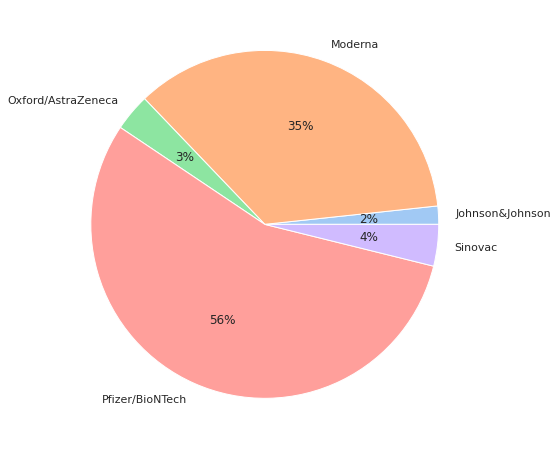

In [15]:
#Plot pie chart of manufacturers used worldwide and their percentage use.

import matplotlib.pyplot as plt
import seaborn as sns
def pie_chart_plotting(df,group, column):
  data = df.groupby(group)[column].sum()
  data = data
  labels = data.keys()
  sns.set(rc={'figure.figsize':(8,8)})
  colors  = sns.color_palette("pastel")
  plt.pie(data, labels = labels, colors = colors, autopct='%1.0f%%')
  plt.show()

pie_chart_plotting(df_by_manufacturer,"vaccine", "total_vaccinations")

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Basic skills used were reading in the data and creating a dataframe, cleaning and wrangling the data then using new skills for encoding some of the data to show which countries were above or below the average vaccinations worldwide. Use of visialisation skills to show vaccination totals per country and pie chart of the vaccine manufacturers. Tried a new mapping tools to show a frequency image of country codes that appear in the dataset.

## What caused you the most difficulty?

New visualisation skills caused some issues that were resolved by researching the correct syntax for labels and legends. 

Managed to create a new dataframe of total vaccinations by country using a for loop within a for loop which hadn't tried since the fundamentals course.Struggled with indexing issues in this dataframe until I found a work around via internet reseach.
 